# Task 2: Customer Segmentation
## Description:
- Dataset (Recommended): Mall Customer (Kaggle)
- Cluster customers into segments based on income and spending score
- Perform scaling and visual exploration of groupings
- Apply K-Means clustering and determine optimal number of clusters
- Visualize clusters using 2D plots
## Bonus:
- Try different clustering algorithms (e.g., DBSCAN)
- Analyze average spending per cluster

# Downloading the dataset

In [1]:
!kaggle datasets download -d shwetabh123/mall-customers

Dataset URL: https://www.kaggle.com/datasets/shwetabh123/mall-customers
License(s): CC0-1.0
  0%|                                               | 0.00/1.56k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.56k/1.56k [00:00<00:00, 4.42MB/s]


In [2]:
!unzip mall-customers.zip

Archive:  mall-customers.zip
  inflating: Mall_Customers.csv      


# K-Means clustering

In [30]:
import pandas as pd
from matplotlib import pyplot as plt 

# Load the dataset
mall_customers = pd.read_csv('Mall_Customers.csv', delimiter=',', header='infer')

In [31]:
# Checking for null values
print("Null values")
mall_customers.isnull().sum()

Null values


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [32]:
# Checking for duplicates
print("Duplicate values")
mall_customers.duplicated().sum()

Duplicate values


np.int64(0)

In [33]:
# Checking the data types of the dataset
print("Data types")
mall_customers.info()

Data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
# Checking the first rows of the dataset
print("First rows")
mall_customers.head()

First rows


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
# Checking summary for basic stats
print("Sumarry of stats")
mall_customers.describe()

Sumarry of stats


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<bound method Figure.show of <Figure size 1500x1000 with 2 Axes>>

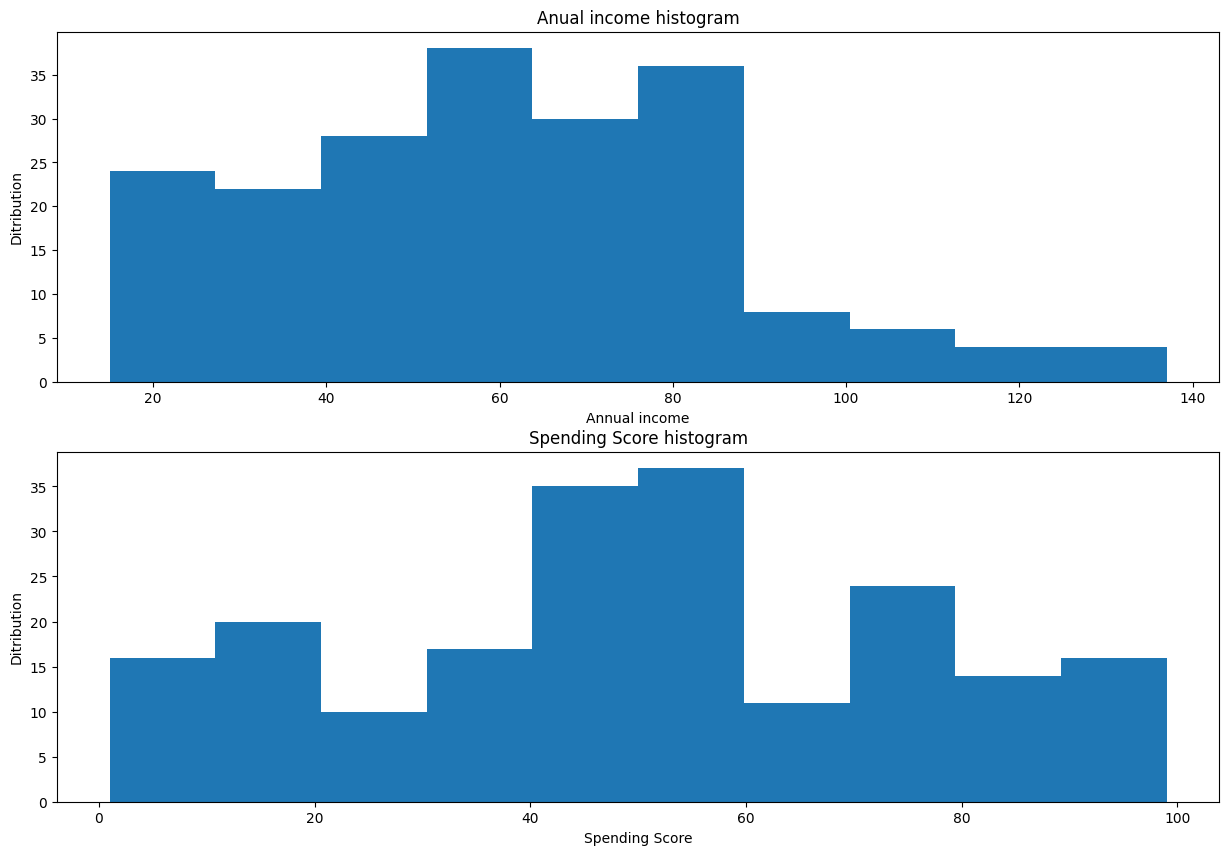

In [36]:
# Visualizing the data
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].hist(mall_customers['Annual Income (k$)'])
ax[0].set_title('Anual income histogram')
ax[0].set_xlabel('Annual income')
ax[0].set_ylabel('Ditribution')

ax[1].hist(mall_customers['Spending Score (1-100)'])
ax[1].set_title('Spending Score histogram')
ax[1].set_xlabel('Spending Score')
ax[1].set_ylabel('Ditribution')

fig.show

<bound method Figure.show of <Figure size 1500x1000 with 2 Axes>>

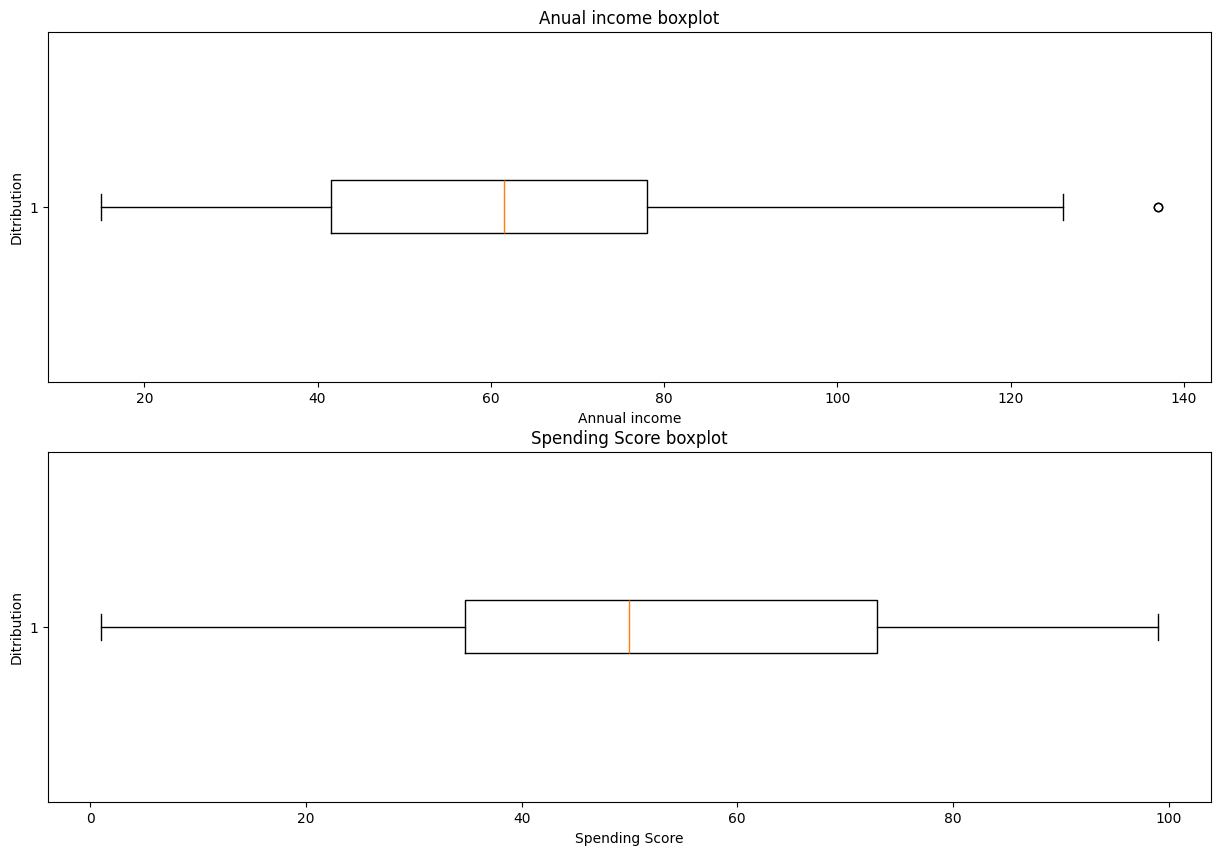

In [37]:
# Visualizing the data
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].boxplot(mall_customers['Annual Income (k$)'], vert=False)
ax[0].set_title('Anual income boxplot')
ax[0].set_xlabel('Annual income')
ax[0].set_ylabel('Ditribution')

ax[1].boxplot(mall_customers['Spending Score (1-100)'], vert=False)
ax[1].set_title('Spending Score boxplot')
ax[1].set_xlabel('Spending Score')
ax[1].set_ylabel('Ditribution')

fig.show

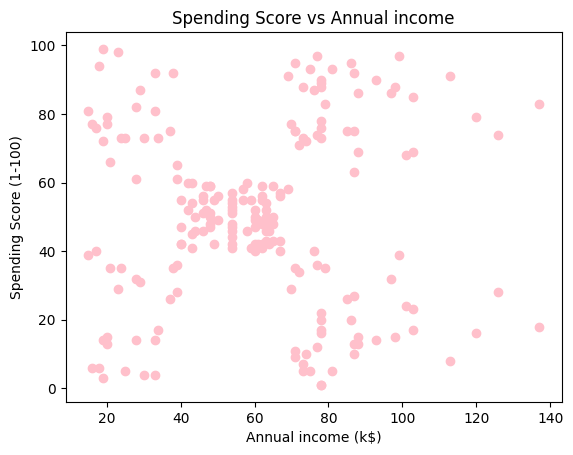

In [38]:
# Visualizing the data
plt.scatter(mall_customers['Annual Income (k$)'], mall_customers['Spending Score (1-100)'], color='pink')
plt.title('Spending Score vs Annual income')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(mall_customers[['Annual Income (k$)','Spending Score (1-100)']])

scaled_df = pd.DataFrame(scaled_data, columns=['Annual Income (k$)','Spending Score (1-100)'])

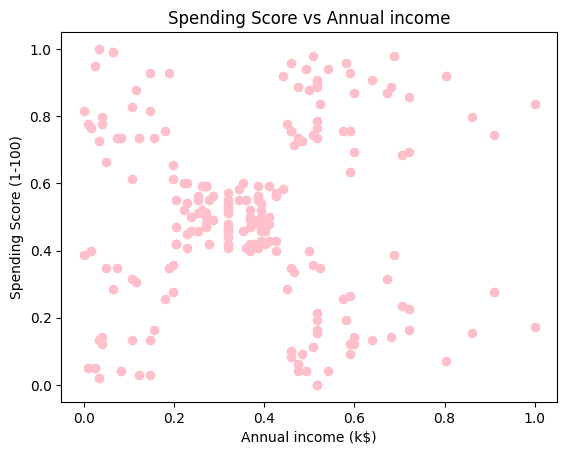

In [40]:
# Visualizing the data after scaling it
plt.scatter(scaled_df['Annual Income (k$)'], scaled_df['Spending Score (1-100)'], color='pink')
plt.title('Spending Score vs Annual income')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

In [41]:
from sklearn.cluster import KMeans
# Clustering the data

model = KMeans(n_clusters=5, max_iter=300, tol=0.0001, verbose=0, random_state=42)
model.fit(scaled_df)
kmeans_labels = model.labels_
centers = model.cluster_centers_

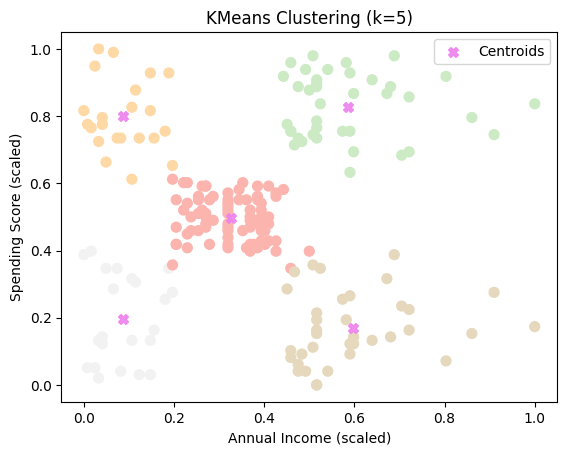

In [43]:
# Visualizing the clusters
plt.scatter(
    scaled_df['Annual Income (k$)'], 
    scaled_df['Spending Score (1-100)'], 
    c=kmeans_labels, cmap='Pastel1', s=50
)

# Plotting the centroids
plt.scatter(
    centers[:, 0], centers[:, 1], 
    c='violet', s=50, alpha=0.9, marker='X', label='Centroids'
)

plt.title('KMeans Clustering (k=5)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')

plt.legend()
plt.show()

# Analyzing average spending per cluster

In [56]:
# Adding the cluster labels to the original df
mall_customers["KMeans Cluster"] = kmeans_labels

# Computing the average spending score per cluster
avg_spending = mall_customers.groupby("KMeans Cluster")["Spending Score (1-100)"].mean()

print(avg_spending)

KMeans Cluster
0    49.543210
1    82.128205
2    79.363636
3    17.583333
4    20.227273
Name: Spending Score (1-100), dtype: float64


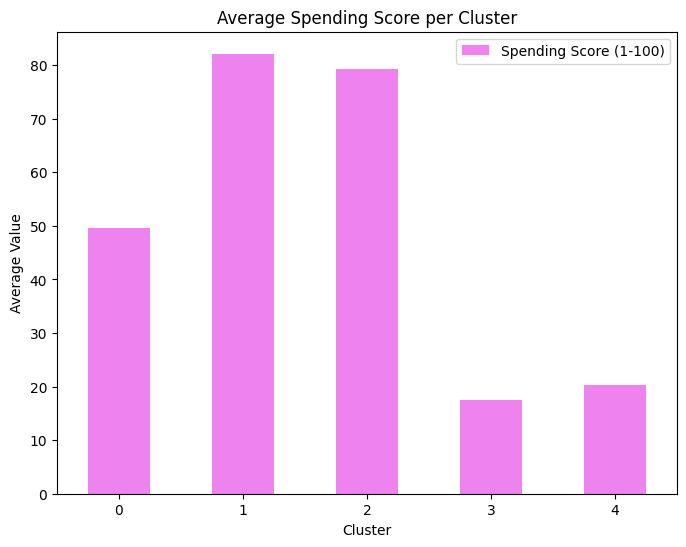

In [57]:
# Ploting as grouped bar chart
avg_spending.plot(kind="bar", figsize=(8,6), color='violet')

plt.title("Average Spending Score per Cluster")
plt.ylabel("Average Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(["Spending Score (1-100)"])
plt.show()

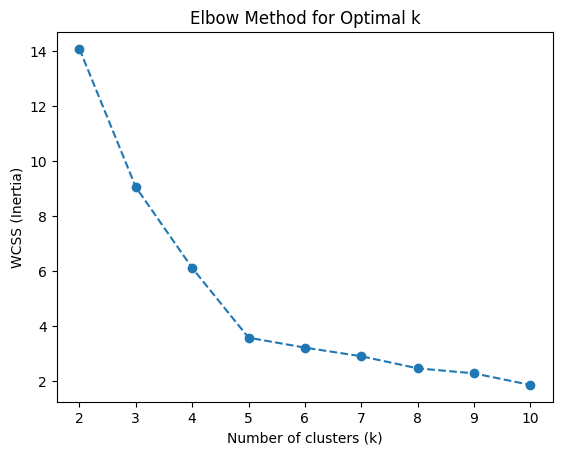

In [46]:
# Using the elbow method to determine if 5 is the optimal number of clusters or there is a better one

# Initializing the within cluster sum of squares
wcss = []

# Testing different number of clusters
for k in range(2, 11):  
    model = KMeans(
        n_clusters=k,
        init='k-means++',
        max_iter=300,
        tol=1e-4,
        random_state=42
    )
    model.fit(scaled_df)
    wcss.append(model.inertia_)

# Plotting the elbow curve
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')

plt.show()

k=2, Silhouette score = 0.345
k=3, Silhouette score = 0.450
k=4, Silhouette score = 0.497
k=5, Silhouette score = 0.559
k=6, Silhouette score = 0.524
k=7, Silhouette score = 0.481
k=8, Silhouette score = 0.474
k=9, Silhouette score = 0.433
k=10, Silhouette score = 0.448


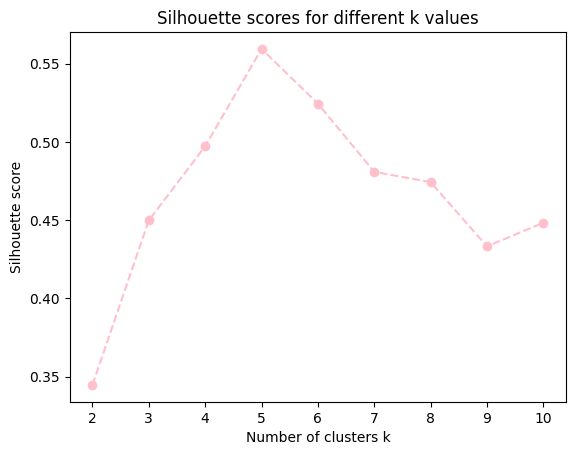

In [47]:
# Using the silhouette score to confirm the optimal K found by the elbow method

from sklearn.metrics import silhouette_score
sil_scores = []

for k in range(2, 11):
    model = KMeans(
        n_clusters=k,
        init='k-means++',
        max_iter=300,
        tol=1e-4,
        random_state=42
    )
    
    labels = model.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    sil_scores.append(score)
    print(f'k={k}, Silhouette score = {score:.3f}')

# Plotting the silhouette scores
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--', color='pink')
plt.title('Silhouette scores for different k values')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette score')
plt.show()

## Conclusion
We can confirm from both the elbow method and the silhouette scores now that k=5 is the optimal number of clusters

# DBSCAN clustering

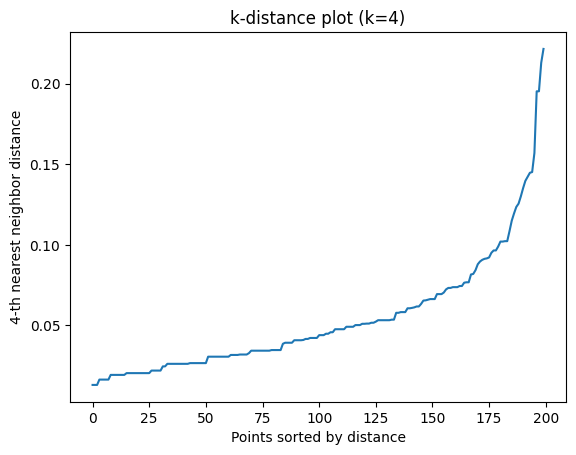

In [48]:
# Plotting the k-distances plot to determine the best possible epsilon value
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fitting NearestNeighbors with a chosen k (min_samples)
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

# Taking the k-th nearest distance (last column)
k_distances = np.sort(distances[:, k-1])

# Plotting the sorted distances
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th nearest neighbor distance")
plt.title(f"k-distance plot (k={k})")
plt.show()

In [49]:
# Printing the results for different eps values cause the elbow in the plot isn't exact or clear
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

exp_eps_values = np.linspace(0.02, 0.20, 19)
min_samples = 4

results = []
for eps in exp_eps_values:
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(scaled_df)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = int((labels == -1).sum())
    
    # Silhouette on non-noise points only (requires at least 2 clusters)
    if n_clusters >= 2:
        mask = labels != -1
        sil = silhouette_score(scaled_df[mask], labels[mask])
    else:
        sil = np.nan
    results.append((eps, n_clusters, n_noise, sil))

for eps, ncl, nnoise, sil in results:
    print(f"eps={eps:.3f}  clusters={ncl:2d}  noise={nnoise:3d}  silhouette={sil}")


eps=0.020  clusters= 3  noise=176  silhouette=0.669761066620095
eps=0.030  clusters= 9  noise=122  silhouette=0.43359069025949093
eps=0.040  clusters= 6  noise= 91  silhouette=0.6300451057155286
eps=0.050  clusters= 9  noise= 65  silhouette=0.45941130217769616
eps=0.060  clusters= 8  noise= 45  silhouette=0.5022073004289721
eps=0.070  clusters= 7  noise= 24  silhouette=0.5576721318433162
eps=0.080  clusters= 7  noise= 18  silhouette=0.5200409528736449
eps=0.090  clusters= 5  noise= 14  silhouette=0.5479008238320937
eps=0.100  clusters= 2  noise= 13  silhouette=0.4044695580761792
eps=0.110  clusters= 2  noise=  8  silhouette=0.393730695618516
eps=0.120  clusters= 2  noise=  8  silhouette=0.393730695618516
eps=0.130  clusters= 2  noise=  6  silhouette=0.39068062594263747
eps=0.140  clusters= 1  noise=  3  silhouette=nan
eps=0.150  clusters= 1  noise=  0  silhouette=nan
eps=0.160  clusters= 1  noise=  0  silhouette=nan
eps=0.170  clusters= 1  noise=  0  silhouette=nan
eps=0.180  clusters=

In [50]:
# Using epsilon of 0.09 which gives balance between minimizing noise and keeping a high silhouette score
model = DBSCAN(eps=0.09, min_samples=4)
model.fit(scaled_df)
labels = model.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([14, 96, 18, 12, 33, 27]))

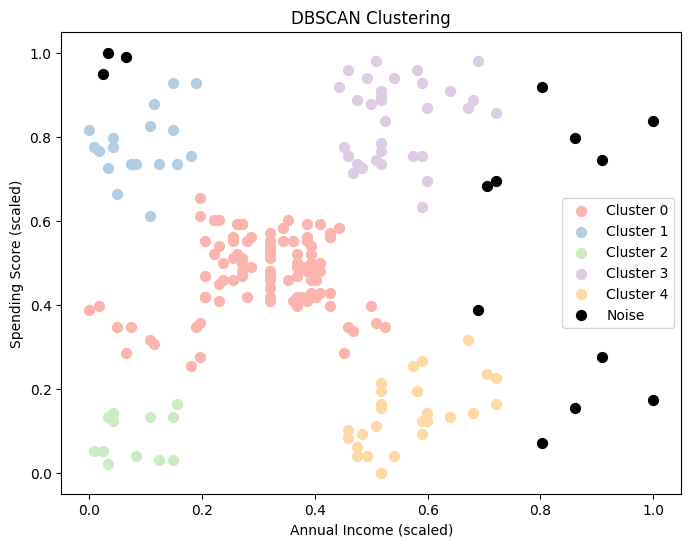

In [51]:
# Visualizing the clusters

plt.figure(figsize=(8, 6))
cluster_labels = set(labels)

for label in cluster_labels:
    if label == -1:
        color = "black"
        label_name = "Noise"
    else:
        color = plt.cm.Pastel1.colors[label]  
        label_name = f"Cluster {label}"

    plt.scatter(
        scaled_df["Annual Income (k$)"][labels == label],
        scaled_df["Spending Score (1-100)"][labels == label],
        s=50,
        c=[color],
        label=label_name
    )

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')

plt.legend()
plt.show()

# Results and discussions
While both algorithms clustered the data into 5 clusters and gave similar results, Kmeans forced all the customers into clusters when DBSCAN showed more robustness for irregular data as it left some extreme points as noise (outliers) resulting in more compact clusters but it also showed sensitivity to parameter choise.

# Analyzing average spending per cluster for DBSCAN

In [52]:
# Adding the cluster labels to the original df
mall_customers["DBSCAN Cluster"] = labels

# Computing the average spending score per cluster
avg_spending = mall_customers.groupby("DBSCAN Cluster")["Spending Score (1-100)"].mean()

print(avg_spending)

DBSCAN Cluster
-1    61.714286
 0    47.312500
 1    77.222222
 2     9.583333
 3    83.000000
 4    14.444444
Name: Spending Score (1-100), dtype: float64


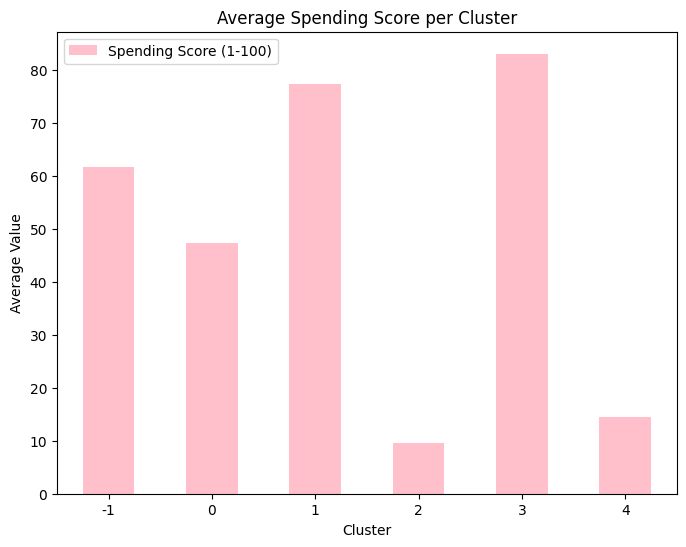

In [54]:
# Ploting as grouped bar chart
avg_spending.plot(kind="bar", figsize=(8,6), color='pink')

plt.title("Average Spending Score per Cluster")
plt.ylabel("Average Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(["Spending Score (1-100)"])
plt.show()